In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('/content/sample_data/california_housing_train.csv')
test = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [4]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [5]:
train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [6]:
import seaborn as sns
sns.set()

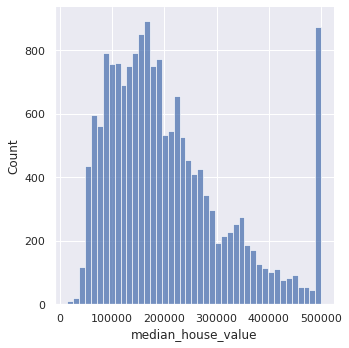

In [7]:
sns.displot(train.median_house_value)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


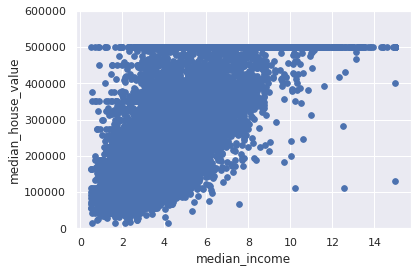

In [8]:

data = pd.concat([train['median_house_value'],train['median_income']], axis=1)

data.plot.scatter(x = 'median_income', y = 'median_house_value', ylim=(0,600000),s=32)

(-0.5, 51.5, 0.0, 600000.0)

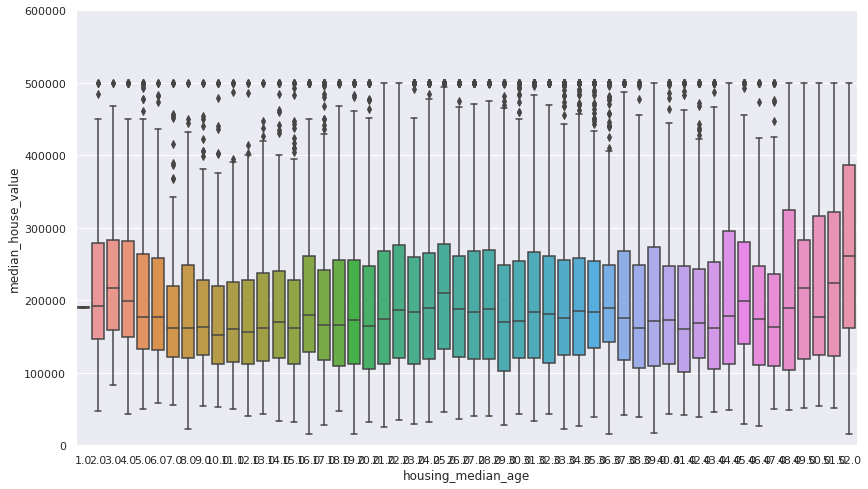

In [9]:
data = pd.concat([train['median_house_value'],train['housing_median_age']], axis=1)
f,ax = plt.subplots(figsize=(14,8))
fig = sns.boxplot(x = 'housing_median_age', y = 'median_house_value', data=data)
fig.axis(ymin=0,ymax=600000)

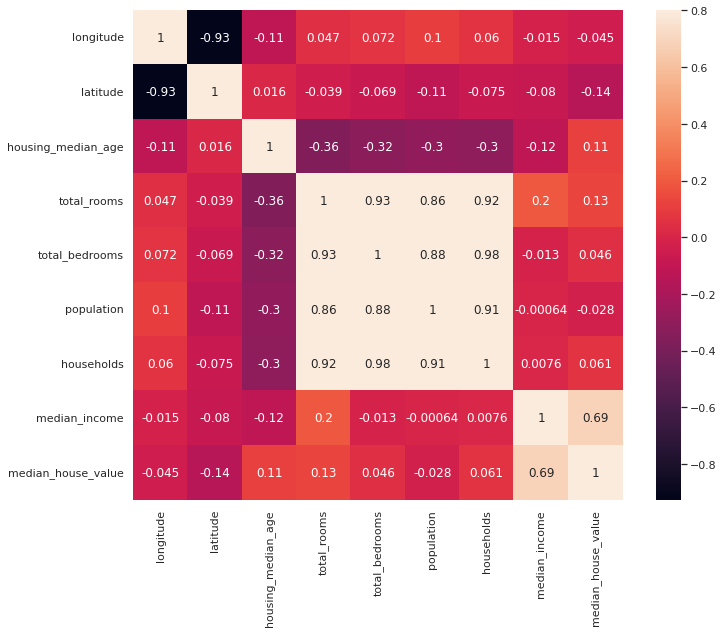

In [10]:
corrmat = train.corr()
f,ax=  plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True,annot=True)

<Figure size 720x720 with 0 Axes>

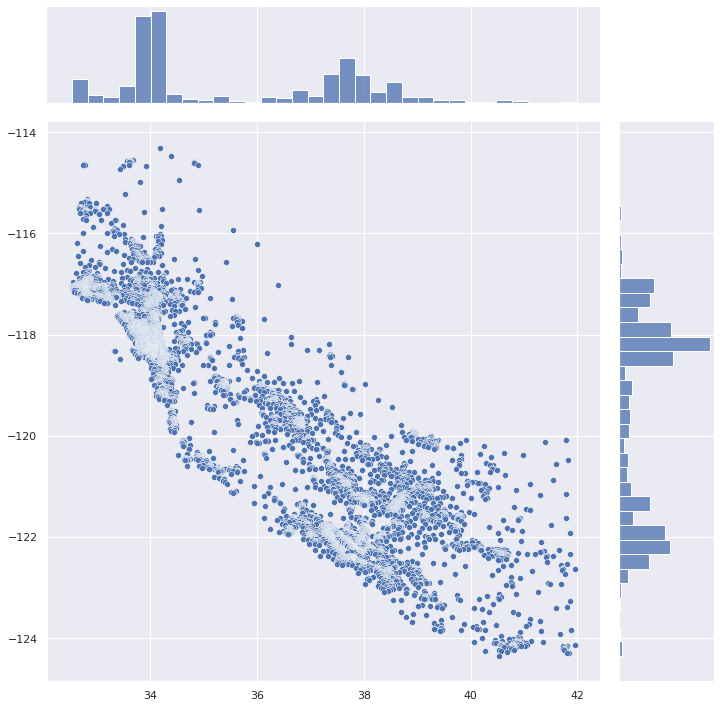

<function seaborn.utils.despine>

In [11]:
plt.figure(figsize=(10,10))
sns.jointplot(x=train.latitude.values, y=train.longitude.values,height=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

In [12]:
y = train['median_house_value']

X = train.drop(['median_house_value'], axis=1)

In [13]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

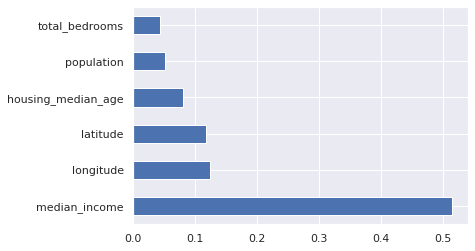

In [14]:
feat_important = pd.Series(et.feature_importances_,index=X.columns)
feat_important.nlargest(6).plot(kind = 'barh')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25,random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
sclr.fit_transform(X_train)

sclr.transform(X_test)


array([[ 0.80124204, -0.82988795, -0.83845175, ...,  0.44999288,
         0.70240976, -0.13064795],
       [ 0.81619503, -0.71784513,  0.59008016, ..., -0.58673268,
        -0.65983692,  0.20684199],
       [ 0.87600698, -0.8345564 , -0.91781464, ..., -0.21368143,
        -0.39925564,  3.757719  ],
       ...,
       [ 0.32274645, -0.16229951,  0.03453997, ..., -0.07431833,
        -0.50245615, -0.94127942],
       [ 0.72149278, -0.81121415,  0.51071728, ..., -0.47881125,
        -0.59017658, -0.16223235],
       [-2.26412035,  2.27930016,  0.11390286, ..., -0.37004004,
        -0.32701529, -0.86655917]])

In [17]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((12750, 8), (4250, 8), (12750,), (4250,))

In [18]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

In [19]:
model = HistGradientBoostingRegressor(max_iter=3000, random_state=1).fit(X_train,y_train)
print(model.score(X_train,y_train))

0.997298620599954


In [20]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
y_pred[y_pred < 0] = 0
print(model.score(X_test,y_test)),print(r2_score(y_pred,model.predict(X_test)))

0.8392407343630418
0.9999992095707926


(None, None)

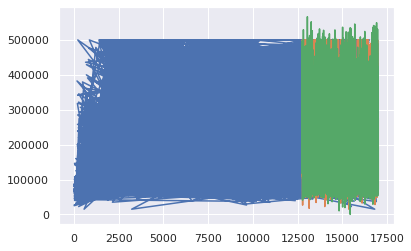

In [21]:
#plot predictions and expected results
import matplotlib.pyplot as plt

plt.plot(y_train)
plt.plot([None for i in y_train]+[x for x in y_test])
plt.plot([None for i in y_train] + [x for x in y_pred])
plt.show()

In [22]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor()
rfg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [23]:
rfg.score(X_train,y_train)

0.9740725597607512

In [24]:
rfg.score(X_test,y_test)

0.8242130204823386

In [25]:
y_pred = rfg.predict(X_test)

In [26]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


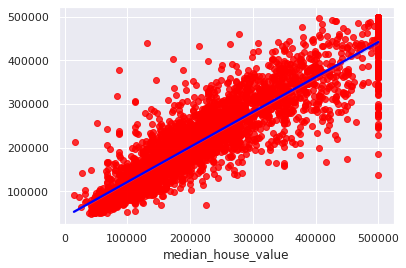

In [27]:
sns.regplot(y_test,y_pred,color='red',line_kws={"color": "blue"})

In [28]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
7235,-118.33,33.82,26.0,5591.0,934.0,2824.0,939.0,6.5861
15675,-122.38,37.76,52.0,248.0,68.0,124.0,51.0,1.4886
7274,-118.34,34.07,52.0,1621.0,284.0,588.0,272.0,6.2223
16239,-122.48,37.70,33.0,4167.0,1398.0,2923.0,1314.0,3.0490
5318,-118.14,33.75,39.0,1995.0,634.0,867.0,567.0,4.0795


In [29]:
import numpy as np


In [30]:
n_estimators=[int(x) for x in np.linspace(start = 100, stop=1200,num=12)] 
max_features = ['auto', 'sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [31]:
# Create the random grid
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth'  : max_depth,
               'min_samples_leaf':min_samples_leaf,
               'min_samples_split' : min_samples_split
    
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_leaf': [1, 2, 5, 10], 'min_samples_split': [2, 5, 10, 15, 100]}


In [32]:
from sklearn.model_selection import RandomizedSearchCV
rnd = RandomizedSearchCV(estimator=rfg,param_distributions=random_grid,n_iter=10,cv=5,scoring='neg_mean_squared_error',
                         random_state=42,n_jobs=-1)

In [33]:
rnd.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [34]:
rnd.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [35]:
rnd.score

<bound method BaseSearchCV.score of RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators

In [36]:
predictions = rnd.predict(X_test)

In [45]:
rnd.best_score_

-2650254613.518167

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


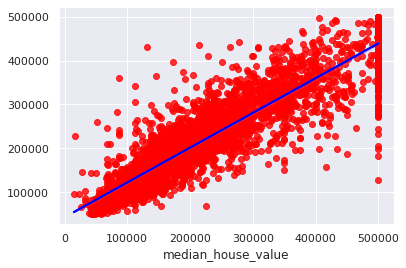

In [44]:
sns.regplot(y_test,predictions,color='red',line_kws={"color": "blue"})